# Perform SCAN (Structural Clustering Algorithm for Networks) algorithm in graph data to identify outlier nodes.

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import networkx as nx

# Create a sample graph
G = nx.Graph()

# Add edges to the graph
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 6)
G.add_edge(6, 1)
G.add_edge(2, 5)
G.add_edge(3, 6)

# Print the graph information
print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 5, 6]
[(1, 2), (1, 6), (2, 3), (2, 5), (3, 4), (3, 6), (4, 5), (5, 6)]


In [3]:
minPts = 5
epsilon = 2.0

In [4]:
def SCAN(G, minPts, epsilon):
    visited = set()
    outliers = []

    # Iterate over each node
    for i in G.nodes():
        if i not in visited:
            # Check if node is a core point
            neighbors = list(G.neighbors(i))
            if len(neighbors) >= minPts:
                # Expand cluster
                visited.add(i)
                cluster = set([i])
                for j in neighbors:
                    if j not in visited:
                        visited.add(j)
                        cluster.add(j)
                        neighbors_j = list(G.neighbors(j))
                        if len(neighbors_j) >= minPts:
                            for k in neighbors_j:
                                if k not in visited:
                                    visited.add(k)
                                    cluster.add(k)
                # Check if cluster size is greater than minPts
                if len(cluster) >= minPts:
                    # Cluster is not an outlier
                    continue
            # Node is an outlier
            outliers.append(i)

    return outliers
outliers = SCAN(G, minPts, epsilon)

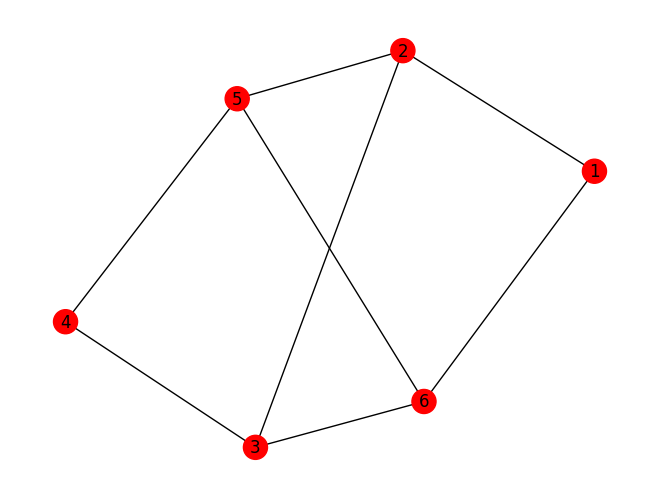

In [5]:
# Create a color map
colors = ['red' if i in outliers else 'blue' for i in G.nodes()]

# Draw the graph with colored nodes
nx.draw(G, node_color=colors, with_labels=True)
plt.show()

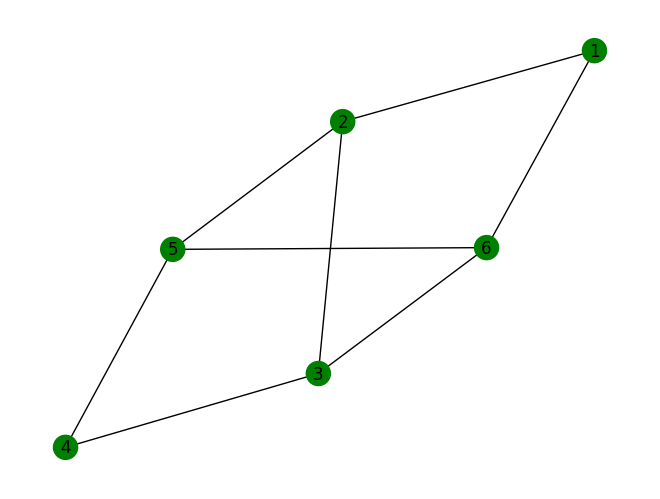

In [6]:
# Create a color map
colors = ['green' if i in outliers else 'blue' for i in G.nodes()]

# Draw the graph with colored nodes
nx.draw(G, node_color=colors, with_labels=True)
plt.show()

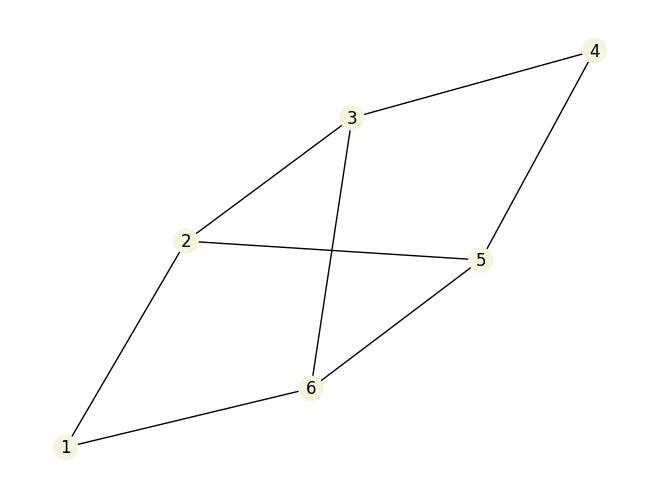

In [7]:
# Create a color map
colors = ['beige' if i in outliers else 'blue' for i in G.nodes()]

# Draw the graph with colored nodes
nx.draw(G, node_color=colors, with_labels=True)
plt.show()